In [38]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv('customer_segmentation.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [40]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [42]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [43]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [44]:
df = df.dropna()

Feature Engineering

In [45]:
df["Total_Spent"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]
df["Education"] = df["Education"].replace({"Master":"Postgraduate", "PhD":"Postgraduate", "Graduation":"Graduate", "Basic":"Undergraduate","2n Cycle":"Undergraduate",})
df["Living_With"] = df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
df["Age"] = 2024 - df["Year_Birth"]
df["Children"] = df["Kidhome"] + df["Teenhome"]
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold", "Kidhome": "KidsAtHome"})
df = df.drop(["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"], axis=1)

In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2216.0,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.00,666666.0
KidsAtHome,2216.0,0.441787,0.536896,0.0,0.0,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.0,0.0,1.00,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.0,49.0,74.00,99.0
Wines,2216.0,305.091606,337.327920,0.0,24.0,174.5,505.00,1493.0
Fruits,2216.0,26.356047,39.793917,0.0,2.0,8.0,33.00,199.0
Meat,2216.0,166.995939,224.283273,0.0,16.0,68.0,232.25,1725.0
Fish,2216.0,37.637635,54.752082,0.0,3.0,12.0,50.00,259.0
Sweets,2216.0,27.028881,41.072046,0.0,1.0,8.0,33.00,262.0
Gold,2216.0,43.965253,51.815414,0.0,9.0,24.5,56.00,321.0


Data Visualization

<Axes: xlabel='Age', ylabel='Total_Spent'>

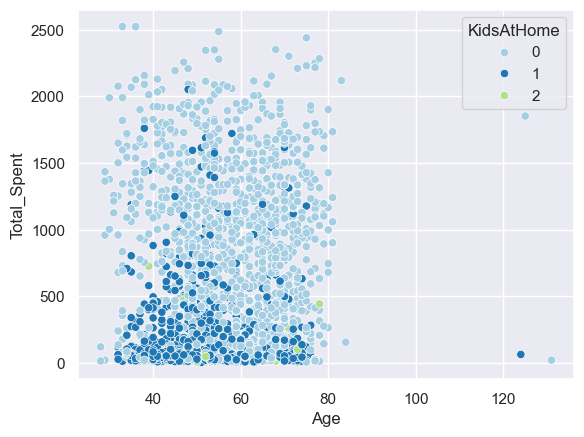

In [48]:
sns.scatterplot(x='Age', y='Total_Spent', hue='KidsAtHome', palette='Paired', data=df)

Here we can see that the more kids are at home, the more a customer spends

### Preparing for PCA

In [82]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

In [52]:
df.columns

Index(['Education', 'Income', 'KidsAtHome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Total_Spent',
       'Living_With', 'Age', 'Children'],
      dtype='object')

In [ ]:
categorical_features =[]

# Collecting non-numeric values
categorical_features = (df.dtypes[df.dtypes == 'object'].index)
label = LabelEncoder()
for i in categorical_features:
    df[i] = df[[i]].apply(label.fit_transform)

In [ ]:
# These are binary features
num_df = df.drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'], axis=1)
scaler = StandardScaler()
scaler.fit(num_df)
scaled = pd.DataFrame(scaler.transform(num_df), columns= num_df.columns)
scaled.head()

,Income,KidsAtHome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Total_Spent,Age,Children
0,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,-0.097812,2.377952,1.675488,0.986443,-1.264803
1,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,-0.097812,-0.420530,-0.962358,1.236801,1.405806
2,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,-0.097812,-0.420530,0.280250,0.318822,-1.264803
3,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,-0.097812,-0.420530,-0.919224,-1.266777,0.070501
4,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,1.391603,0.333796,0.112428,0.061232,-0.131574,-0.097812,-0.420530,-0.307044,-1.016420,0.070501


### PCA

In [84]:
pca = PCA(n_components=3)
pca.fit(scaled)
pca_ds = pd.DataFrame(pca.transform(scaled), columns=(["ft1","ft2", "ft3"]))
pca_ds.head()

,ft1,ft2,ft3
0,4.569535,-0.123173,2.100377
1,-2.807248,0.553705,-1.167527
2,2.076816,-0.573656,-0.281543
3,-2.559045,-1.537022,0.690133
4,-0.417287,-0.136331,0.385837


### K-Means Algorithm

In [85]:
from sklearn.cluster import KMeans

In [86]:
# Setting up for elbow method
error = []
for n in range(1, 15):
    model = KMeans(n_clusters=n)
    model.fit(df)
    error.append(model.inertia_)

print(error)

[1404800276771.7002, 674934709195.6792, 319718456093.0914, 183532227958.71295, 122595722384.31268, 81293203531.19072, 53827507009.418625, 40317592063.89763, 31855793231.123997, 24154910670.782, 19757656752.91096, 16518393964.157185, 13561746794.239624, 11541686152.8699]


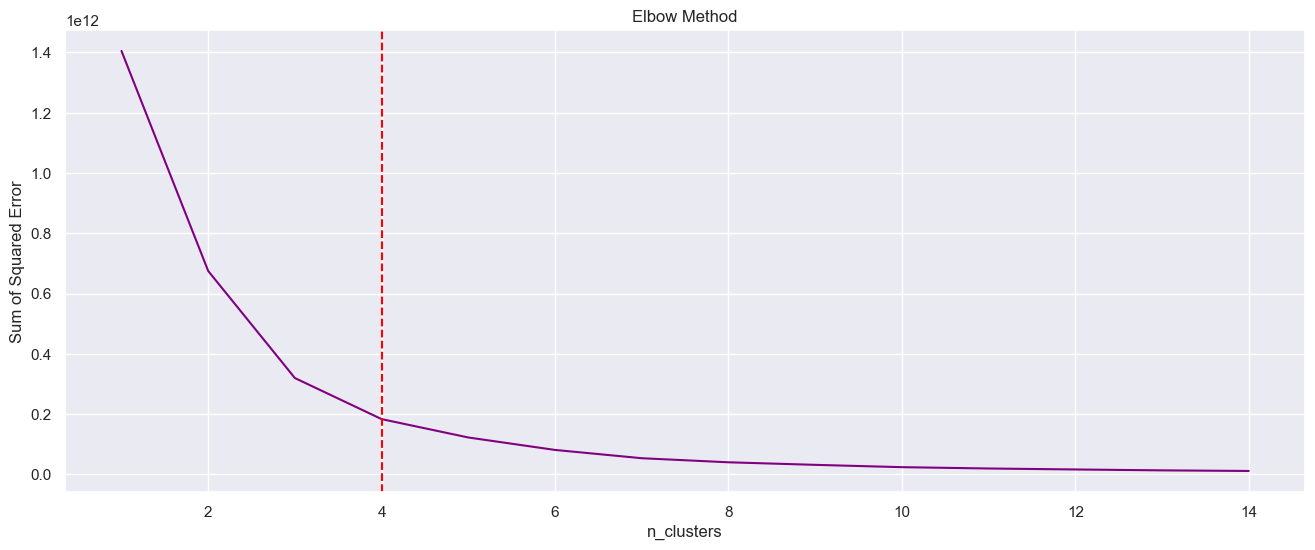

In [91]:
fig, ax = plt.subplots(figsize=(16,6))
sns.lineplot(x=range(1,15), y=error, color='purple')
ax.set_title('Elbow Method')
ax.set_xlabel('n_clusters')
ax.set_ylabel('Sum of Squared Error')
ax.axvline(x=4, color='red', linestyle='--')

#### Using n_cluster = 4

In [96]:
kmeans = KMeans(n_clusters=4)
y_pred = kmeans.fit_predict(pca_ds)
pca_ds['cluster'] = y_pred
pca_ds.head(25)

,ft1,ft2,ft3,cluster
0,4.569535,-0.123173,2.100377,0
1,-2.807248,0.553705,-1.167527,2
2,2.076816,-0.573656,-0.281543,0
3,-2.559045,-1.537022,0.690133,1
4,-0.417287,-0.136331,0.385837,1
5,0.807155,1.145321,-0.246107,3
6,0.645207,1.161946,0.093228,3
7,-2.304358,-1.083049,1.178628,1
8,-2.652104,-1.408632,2.368743,1
9,-4.858117,1.088034,0.786009,2
